In [46]:
from sympy import symbols, integrate, sqrt
import numpy as np
#lambda t, T, a=0.9, b=0.6, c=0.1: a / (t + b) + c


# Define the symbols for time t, and parameters a, b, c
t, T,  a, b, c = symbols('t T a b c' )

# Define the vol_structure function using SymPy notation
sigma_bsr = a / (T-t + b) + c
sigma_bsr
#int_var_bs.evalf(subs={t:0}).rewrite



a/(T + b - t) + c

## Variance

In [47]:
var_bsr = sigma_bsr**2
var_bsr
int_var_bsr = integrate(var_bsr,t)
int_var_bsr

-a**2/(-T - b + t) - 2*a*c*log(-T - b + t) + c**2*t

In [48]:
int_var_bsr.refine

<bound method Basic.refine of -a**2/(-T - b + t) - 2*a*c*log(-T - b + t) + c**2*t>

In [73]:
from numpy import log
def integral_brs(s,T, a, b,c):
    return(a**2/(T - s + b) - 2*a*c*log(T - s + b) + c**2*s)

In [80]:

t = 0
T = 1 
tau = 1/1000
a= 0.9
b = 0.6
c= 0.1
    
upper_integral = integral_brs(tau, T, a,b,c ) 
lower_integral = integral_brs(t, T, a,b,c ) 

variance =  (upper_integral - lower_integral)/(tau-t)
print("upper_integral:"+ str(upper_integral))
print("lower_integral:"+ str(lower_integral))

vol = sqrt(variance)

print("volatility:"+ str(vol))


upper_integral:0.4220884860342527
lower_integral:0.42164934673576754
volatility:0.662675862307628


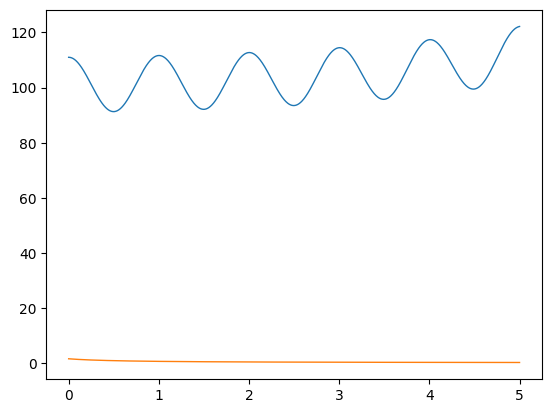

In [40]:
import matplotlib.pyplot as plt

def term_structure(t, T_max=5.0):
    # Define a term structure function that could depend on t
    # Simple sinusoidal term structure for demonstration
    return 100 + 10 * np.cos(2*T_max * np.pi * t /T_max) + np.exp(0.5*t)

def vol_structure(t, T, a= 0.9, b = 0.6, c= 0.1):
    return a / (t + b) + c

# Parameters 
T = 5  # Total time in years
dt = 1/252  # Daily time step
n_steps = int(T / dt)

taus = np.arange(0, n_steps + 1) * dt  # Time steps

plt.plot(taus, term_structure(taus, T), lw=1, label='Term Structure')
plt.plot(taus, vol_structure(taus, T), lw=1, label='Volatility Structure')






## Simulation

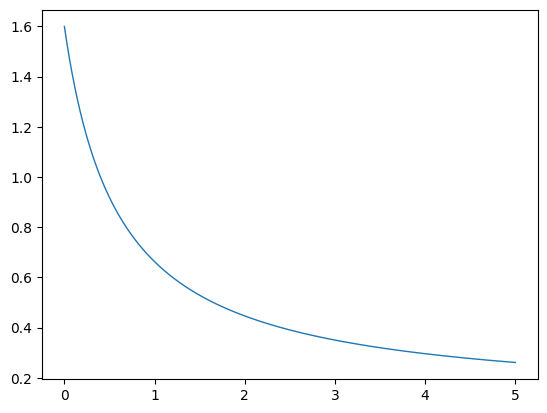

In [41]:
# Parameters 
T = 5  # Total time of the simulation in years
F0 = term_structure(0)  # Initial forward price using the term structure
dt = 1/252  # Daily time step
paths = 1000  # Number of paths to simulate
n_steps = int(T / dt)

taus = np.arange(0, n_steps + 1) * dt  # Time steps

#plt.plot(taus, term_structure(taus, T), lw=1, label='Term Structure')
plt.plot(taus, vol_structure(taus, T), lw=1, label='Term Structure')

Int1 = 0
Int2 = 0
Int3 = 0

#F1 = F0 * np.exp(Int1 * rand1 - 0.5 * Int1**2) * np.exp(Int2 * rand2 - 0.5 * Int2**2) * np.exp(Int3 * rand3 - 0.5 * Int3**2)
